## Загрузка и визуализация данных

Загрузим исходный набор испытаний (выборку) двух случайных величин $X$ и $Y$. Пара значений $(x_i, y_i)$ соовтетствуют измерениям двух случайных величин в $i$-ом испытании. Запишем значения в массивы `X` и `Y`.

In [77]:
import numpy as np
import matplotlib.pyplot as plt

location = 'https://raw.githubusercontent.com/ordevoir/Miscellaneous/master/datasets/correlated_data.csv' 
data = np.genfromtxt(location, delimiter=',', dtype=np.float64, 
                     encoding='utf-8', skip_header=1)

X, Y = data[:, 0], data[:, 1]

print(f"  X\t\t  Y")
for i in range(5):
    print(f"{X[i]}\t\t{Y[i]}")

  X		  Y
1270.35		1026.08
697.87		375.4
1226.37		1147.14
1190.16		1006.19
1123.62		957.73


Для того, чтобы визуально оценить наличие корреляции между $X$ и $Y$, изобразим на диаграмме точки $(x_i, y_i)$:

Text(0, 0.5, 'Y')

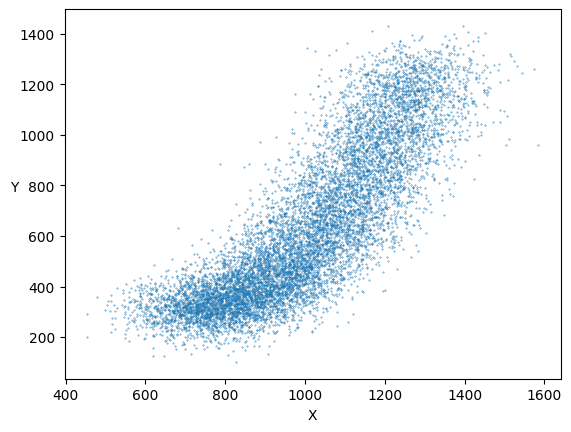

In [78]:
plt.scatter(X, Y, s=0.1)
plt.xlabel("X")
plt.ylabel("Y", rotation=0)

На диаграмме можно заметить, что между случайными величинами $X$ и $Y$ наблюдается некоторая зависимость: бóльшим значениями из $X$ преимущественно соответствуют бóльшие значения из $Y$.

## Ковариация
**Ковариация** (*covariance*) или **корреляционный момент** является мерой зависимости двух случайных величин. Если две случайные величины имеют положительную ковариацию, то они склонны расти или убывать одновременно. Если они имеют отрицательную ковариацию, то они склонны двигаться в противоположных направлениях. Если они имеют нулевую ковариацию, то они не имеют линейной связи между собой.

Ковариация двух случайных величин X и Y определяется как математическое ожидание произведения их отклонений от своих средних значений:

$$ \mathrm{cov}(X,Y) = \mathbb E[(X - \mathbb E(X))(Y - \mathbb E(Y))] $$
где $\mathbb E$ - математическое ожидание.

#### Выборочная ковариация

Ковариация, оцениваемая эмпирически на основе данных выборки
$$ \sigma_{XY} = \mathrm{cov}(X,Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)(y_i - \overline y) = \frac{1}{n} \sum_{i=1}^n x_i \space y_i - \overline x \space \overline y$$
где $\overline x$ и $\overline y$ – средние значения.

>Заметим, что ковариация случайной величины между собой есть дисперсия:
>$$ \mathrm{cov}(X,X) = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)^2 = \sigma_X^2 = \sigma_{XX}$$
По аналогии с исправленной дисперсией, можно рассматривать исправленную ковариацию, где вместо множителя $(1/n)$ используется $\frac{1}{n-1}$

In [81]:
def cov(X, Y):
    return np.sum((X - X.mean()) * (Y - Y.mean())) / len(X)

print(f"{cov(X, Y) = :.2f}     ковариация между X и Y ")
print(f"{cov(Y, X) = :.2f}     ковариация между Y и X ")


cov(X, Y) = 50044.65     ковариация между X и Y 
cov(Y, X) = 50044.65     ковариация между Y и X 


>Заметим, что $\mathrm{cov}(X,Y) = \mathrm{cov}(Y, X)$.

Получить значение ковариации между двумя двумя случайными величинами можно при помощи функции `cov()` из библиотеки NumPy.

In [85]:
np.cov(X, Y)            # ковариационная матрица

array([[38203.41318045, 50049.65760421],
       [50049.65760421, 92493.90251806]])

In [86]:
np.var(X), np.var(Y)    # дисперсии

(38199.592839127996, 92484.65312781277)

## Коэффициент корреляции PCC
По абсолютному значению ковариации нельзя судить о том, насколько сильно величины взаимосвязаны, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений случайных величин. Полученная величина называется **коэффициентом корреляции Пирсона** (*Pearson Correlation Coefficient* (PCC))
$$ \mathbf r_{XY} = \frac {\sigma_{XY}}{\sigma_X \sigma_Y} $$
Коэффициент корреляции находится в интервале от $-1$ до $1$. Две случайные величины коррелируют, если $\sigma_{XY}$ или $\mathbf r_{XY}$ отличны от нуля. При $\mathbf r_{XY} > 0$ имеет место положительная корреляция, а при $\mathbf r_{XY} < 0$ – отрицательная корреляция.

In [91]:
def r(X, Y):
    return cov(X, Y) / (np.std(X) * np.std(Y))

print(f"{r(X, Y) = }")
print(f"{r(Y, X) = }")
print(f"{r(X, X) = }")
print(f"{r(Y, Y) = }")

r(X, Y) = 0.8419639098282211
r(Y, X) = 0.8419639098282211
r(X, X) = 1.0
r(Y, Y) = 1.0000000000000002


Получить значение коэффициента корреляции Пирсона между двумя двумя случайными величинами можно при помощи функции `corrcoef()` из библиотеки NumPy.

In [92]:
np.corrcoef(X, Y)

array([[1.        , 0.84196391],
       [0.84196391, 1.        ]])

## Ковариационная матрица

При представлении данных буквой $\mathbf X$ обычно обозначают матрицу $ n \times d $ строки которй представляют $n$ объектов, описываемые $d$ признаками. $\mathbf x_r$ обозначает $r$-ую строку $\mathbf X$, $\mathbf x_c$ - $c$-ую колонку, а $x_{rc}$ - элемент на пересечении $r$-ой строки и $c$-ой колонки. Каждую колонку этой матрицы можно рассматривать как набор исходов случайной величины.

In [93]:
X = np.array([  [2., 3.2, 5.1],
                [4., 3.3, 5.3],
                [2., 3.1, 5.4],
                [4., 3.1, 5.3],
                [6., 3.0, 5.6],
                [8., 3.1, 5.7]    ])

n, d = X.shape

Среднее по $j$-му столбцу (эмпирическая оценка математического ожидания) определяется формулой
$$\mu_j = \frac{1}{n} \sum_{i=1}^n \mathbf x_{ij}$$
$\mu^{\mathrm T}$ обозначает вектор-строку, содержащий средние по всем столбцам. Если $\mathbf 1$ - $n$-мерный вектор, содержащий только единицы, то $\mathbf 1 \mu^{\mathrm T}$ - матрица размерности $n \times d$, строками которой являются векторы $\mu^{\mathrm T}$.

In [ ]:
mu_T = np.average(X, axis=0).reshape(1, 3)  # вектор-строка
print(f"{mu_T = }")
ones = np.ones(shape=(n,1))                 # вектор-столбец
print('shapes', ones.shape, mu_T.shape)
averages = np.matmul(ones, mu_T)
print(averages)

mu_T = array([[4.33333333, 3.13333333, 5.4       ]])
shapes (6, 1) (1, 3)
[[4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]]


Центрированная матрица (zero-centred) $ \mathbf X' = \mathbf X - \mathbf 1 \mu^{\mathrm T} $

In [ ]:
X_centered = X - averages
print(X_centered)

[[-2.33333333e+00  6.66666667e-02 -3.00000000e-01]
 [-3.33333333e-01  1.66666667e-01 -1.00000000e-01]
 [-2.33333333e+00 -3.33333333e-02  8.88178420e-16]
 [-3.33333333e-01 -3.33333333e-02 -1.00000000e-01]
 [ 1.66666667e+00 -1.33333333e-01  2.00000000e-01]
 [ 3.66666667e+00 -3.33333333e-02  3.00000000e-01]]


Матрицей разброса (scatter matrix) называется матрица $\mathbf S$ размерности $d \times d$
$$ \mathbf S = \mathbf X'^{\mathrm T} \mathbf X'= \mathbf X^{\mathrm T} \mathbf X - n \mathbf M $$
где $ \mathbf M = \mu \mu^{\mathrm T} $ - матрица $d \times d$ элементами которой являютсяпроизведения средних по столбцам $ m_{ij} = \mu_j \mu_c $.

In [ ]:
mu = mu_T.transpose()
M = np.matmul(mu, mu_T)
print(M)

[[18.77777778 13.57777778 23.4       ]
 [13.57777778  9.81777778 16.92      ]
 [23.4        16.92       29.16      ]]


In [ ]:
S = np.matmul(X_centered.transpose(), X_centered)
print(S)
S_alt = np.matmul(X.transpose(), X) - n * M
print(S_alt)

[[27.33333333 -0.46666667  2.2       ]
 [-0.46666667  0.05333333 -0.07      ]
 [ 2.2        -0.07        0.24      ]]
[[27.33333333 -0.46666667  2.2       ]
 [-0.46666667  0.05333333 -0.07      ]
 [ 2.2        -0.07        0.24      ]]


In [ ]:
# заметим, что несмотря на визуальное равенство матриц
# S и S_alt сревнение матриц дает False:
print(S == S_alt)
print(np.array_equal(S, S_alt))

[[False False False]
 [False False False]
 [False False False]]
False


In [ ]:
# это происходит в силу ошибок округления элементов типа float
# адекватное сравнение можно произвести функциями isclose и allclose:
print(np.isclose(S, S_alt))
print(np.allclose(S, S_alt))
# функцию isclose можно использовать для сравнения чисел float

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


Ковариационной матрицей матрицы $\mathbf X$ называется матрица $ \mathbf \Sigma = \frac{1}{n} \mathbf S $, элементами которой являются попарные ковариации между колонками матрицы $\mathbf X $:
$$ \sigma_{jc} = \mathrm{cov}(\mathbf x_j, \mathbf x_c) = \frac{1}{n} \sum_{i=1}^n(\mathbf X_{ij} - \mu_j)(\mathbf X_{ic} - \mu_c) = \frac{1}{n} \left( \sum_{i=1}^n \mathbf X_{ij} \mathbf X{ic} - \mu_i \mu_c \right) $$
$\sigma_{jc}$ - ковариация между колонками $j$ и $c$.<br>
$\sigma_{jj}$ - дисперсия $j$-й колонки:
$$ \sigma_{jj} = \sigma_{j}^2 = \frac{1}{n} \sum_{i=1}^n(\mathbf X_{ij} - \mu_j)^2 = \frac{1}{n} \left( \sum_{i=1}^n \mathbf X_{ij}^2 - \mu_i \right) $$

In [ ]:
cov_12 = (1/n) * np.sum((X[:, 1] - mu[1]) * (X[:, 2] - mu[2]))
print(cov_12)       # ковариация между колонками 1 и 2

-0.011666666666666672


In [ ]:
cov_matrix = np.empty(shape=(d, d))
for i in range(d):
    for j in range(d):
        cov_matrix[i, j] = cov(X[:, i], X[:, j])

cov_matrix

array([[ 4.55555556, -0.07777778,  0.36666667],
       [-0.07777778,  0.00888889, -0.01166667],
       [ 0.36666667, -0.01166667,  0.04      ]])

в отличие от нашей функции `cov` функция `cov` из numpy вычисляет исправленные ковариации, где вместо множителя $(1/n)$ используется $\frac{1}{n-1}$

In [ ]:
np.cov(X.transpose())

array([[ 5.46666667, -0.09333333,  0.44      ],
       [-0.09333333,  0.01066667, -0.014     ],
       [ 0.44      , -0.014     ,  0.048     ]])

Ковариационная матрица является симметричной, и на пересечении $i$, $j$ этой матрицы располагаются ковариация между колонками $i$ и $j$ матрицы $\mathbf X$.

## Генерация коррелирующи данных

In [41]:
import numpy as np
from sklearn import utils

sample_size = 10000

X, Y = np.empty(sample_size), np.empty(sample_size)
# зададим значения X и Y функциями (с шумом):
for i in range(sample_size):
    x = i / 100
    X[i] = 6 * x  + 700 + np.random.normal(scale=90)
    Y[i] = 0.1 * (x**2) + 300 + np.random.normal(scale=60)

X, Y = utils.shuffle(X, Y)

print(f"X \t\t Y")
for i in range(10):
    print(f"{X[i]:.4f} \t {Y[i]:.4f}")

X 		 Y
1270.3542 	 1026.0827
697.8722 	 375.4046
1226.3743 	 1147.1385
1190.1552 	 1006.1862
1123.6182 	 957.7274
962.5028 	 451.7731
854.7979 	 325.4902
861.6859 	 451.9642
923.9617 	 353.2993
845.4923 	 427.6862


Сохраним данные в формате csv

In [52]:
data = np.hstack((X.reshape(-1, 1), Y.reshape(-1, 1)))

np.savetxt('correlated_data.csv', data, delimiter=',',
            header='X, Y', comments='', fmt='%.2f')

[[1270.35 1026.08]
 [ 697.87  375.4 ]
 [1226.37 1147.14]]
